<a href="https://colab.research.google.com/github/mohdsaqibansari/Machine-Learning/blob/main/DHCD_CNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Training Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Dataset/Training/'
files=os.listdir(path)
keys=[]
for i in range(46):
    keys.append(str(i))
labels=[]
for i in range(46):
    labels.append(i)
dictionary=dict((key,value) for key,value in zip(keys,labels))
print(dictionary)
import cv2
X=[]
y=[]
for cl in dictionary:
    pth=path+cl
    for img_name in os.listdir(pth):
        img=cv2.imread(pth+'/'+img_name,0)
        X.append(img)
        print(cl)
        y.append( dictionary[cl])
X=np.array(X)
y=np.array(y)
X_scaled=X/255
X.max(),X.min(),X_scaled.max(),X_scaled.min()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=7)


Streaming output truncated to the last 5000 lines.
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
4

**Importing Necessary Libraries for Neural Network**

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D

**Checking the shape of Dataset**

In [3]:
X.shape

(78220, 32, 32)

In [4]:
y.shape

(78220,)

**Changing the shape of input to 4-D for the CNN** 

In [5]:
X_train_cnn=np.expand_dims(X_train,-1)
X_train_cnn.shape

(62576, 32, 32, 1)

In [6]:
X_test_cnn=np.expand_dims(X_test,-1)
X_test_cnn.shape

(15644, 32, 32, 1)

In [7]:
from tensorflow.keras import layers, models
from keras.layers import BatchNormalization

**Callback Function is here**

In [8]:
callback=tensorflow.keras.callbacks.EarlyStopping(
monitor='val_loss',
min_delta=0.0001,
patience=20,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False)

**Architecture for Feature Extraction**

In [9]:
cnn_9=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3), input_shape=(32,32,1)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    
])

In [10]:
cnn_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

**Output of above Architecture is stored in x_inp, i.e., Flatten Layer output is stored in x_inp**

In [11]:
x_inp=cnn_9.output

**Now, Output of x_inp is fed to Fully Connected Layers as below**

In [12]:
from keras.backend import dropout
model_1=Dense(128,activation='relu')(x_inp)
model_1=BatchNormalization()(model_1)
model_1=layers.Dropout(0.2)(model_1)
model_1=Dense(64,activation='relu')(model_1)
model_1=BatchNormalization()(model_1)
model_1=layers.Dropout(0.2)(model_1)
pred_1=Dense(46,activation='softmax')(model_1)

In [13]:
from keras.models import Model

**Adam is used as the optimizer and model summary is shown below**

In [14]:
cnn_model_1=Model(inputs=cnn_9.input,outputs=pred_1)
cnn_model_1.compile(loss='sparse_categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
),metrics=['accuracy'])
cnn_model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                             

**Now, Training is done here.**

In [15]:
history_9=cnn_model_1.fit(X_train_cnn,y_train,batch_size=32,epochs=300,validation_data=(X_test_cnn,y_test),verbose=1,callbacks=callback)

Epoch 1/300
1956/1956 [==============================] - 26s 7ms/step - loss: 0.8047 - accuracy: 0.7896 - val_loss: 0.1503 - val_accuracy: 0.9543
Epoch 2/300
1956/1956 [==============================] - 12s 6ms/step - loss: 0.1996 - accuracy: 0.9418 - val_loss: 0.0732 - val_accuracy: 0.9765
Epoch 3/300
1956/1956 [==============================] - 12s 6ms/step - loss: 0.1397 - accuracy: 0.9587 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 4/300
1956/1956 [==============================] - 12s 6ms/step - loss: 0.1083 - accuracy: 0.9666 - val_loss: 0.0619 - val_accuracy: 0.9822
Epoch 5/300
1956/1956 [==============================] - 12s 6ms/step - loss: 0.0909 - accuracy: 0.9725 - val_loss: 0.0680 - val_accuracy: 0.9801
Epoch 6/300
1956/1956 [==============================] - 13s 7ms/step - loss: 0.0791 - accuracy: 0.9755 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 7/300
1956/1956 [==============================] - 12s 6ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0467 -

**Loss V/s Epochs**

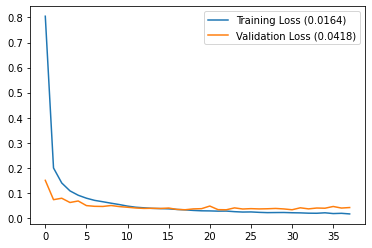

In [16]:
plt.plot(history_9.history['loss'],label='Training Loss (0.0164)')
plt.plot(history_9.history['val_loss'],label='Validation Loss (0.0418)')
plt.legend()
plt.show()

**Accuracy V/S Epochs**

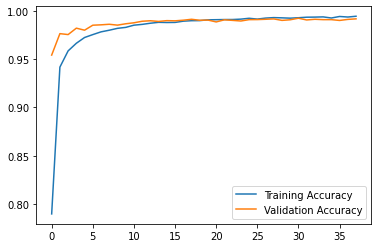

In [17]:
plt.plot(history_9.history['accuracy'],label='Training Accuracy')
plt.plot(history_9.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

**SVM is imported here**

In [18]:
from sklearn import svm
clf_1= svm.SVC(kernel='rbf')

**As Architecture is divided into 2 parts:
one is for feature extraction and other for fully connected layer for capturing the weights and biases, 
So, Feature Extraction Architecture is used to capture the best features from the Training Dataset.
These newly extracted Features are fed to SVM Classifier for Prediction.**

In [19]:
X_for_svm=cnn_9.predict(X_train_cnn)

In [20]:
clf_1.fit(X_for_svm,y_train)

SVC()

**Importing the Testing Data**

In [21]:
test_path='/content/drive/MyDrive/Dataset/DHCD_Testing/'
test_files=os.listdir(test_path)
test_list=[]
for i in range(46):
    test_list.append(str(i))
test_labels=[]
for i in range(46):
    test_labels.append(i)
test_dictionary=dict((key,value) for key,value in zip(test_list,test_labels))
print(test_dictionary)
test_X=[]
test_y=[]
for test_cl in test_dictionary:
    test_pth=test_path+test_cl
    for img_name_test in os.listdir(test_pth):
        test_img=cv2.imread(test_pth+'/'+img_name_test,0)
        test_X.append(test_img)
        print(test_cl)
        test_y.append( test_dictionary[test_cl])

Streaming output truncated to the last 5000 lines.
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
3

**Changing the Dataset into Numpy Array**

In [22]:
test_X=np.array(test_X)
test_y=np.array(test_y)
test_X.shape,test_y.shape

((13800, 32, 32), (13800,))

**Changing the Testing Dataset Dimension to 4-D**

In [23]:
test_X_cnn_new=np.expand_dims(test_X,-1)
test_X_cnn_new.shape

(13800, 32, 32, 1)

**Making the pixel value from 0-255 to 0-1**

In [24]:
test_X_cnn_new_sc=test_X_cnn_new/255
test_X_cnn_new_sc.max(),test_X_cnn_new_sc.min()

(1.0, 0.0)

**Now, Again Features are extracted by the same Architecture and
these Testing features are fed to SVM for prediction**

In [25]:
X_for_test_svm=cnn_9.predict(test_X_cnn_new_sc)
pred_1=clf_1.predict(X_for_test_svm)

**Checking the Accuracy_Score of SVM Classifier**

In [26]:
from sklearn import metrics
metrics.accuracy_score(pred_1,test_y)

0.9939130434782608

**Checking the Accuracy of Complete CNN model**

In [27]:
cnn_model_1.evaluate(test_X_cnn_new_sc,test_y)

432/432 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9925


[0.03800436109304428, 0.9925362467765808]

**As we can see here, using CNN, Accuracy is 99.25% but 
when SVM is used Accuracy achieved is 99.39%. 
Not only Accuracy increased but also Parameters are also reduced as in case of CNN with Fully Connected Layers are 309,614 whereas if only Feature Extraction Architecture is used, only 92,672 parameters are used.**